# Polynomial Regression

## Importing the libraries

In [ ]:
# =========================================
# Importing Required Libraries
# =========================================

# ================================
# NumPy
# ================================
# Used for numerical operations and working with arrays
import numpy as np

# ================================
# Matplotlib
# ================================
# Used for data visualization (mainly the pyplot module)
import matplotlib.pyplot as plt

# ================================
# Pandas
# ================================
# Used for importing datasets and creating:
#   - Feature matrix (X)
#   - Dependent variable vector (y)
import pandas as pd


## Importing the dataset

In [ ]:
# ================================
# Import the dataset
# ================================
# Read the CSV file containing Position and Salary data
dataset = pd.read_csv('Position_Salaries.csv')

# ================================
# Prepare Feature Matrix (X)
# ================================
# iloc[:, 1:-1] → take all rows, columns from index 1 to the second-last column
# In our dataset:
#   - Column 0: Position (not used as numeric feature)
#   - Column 1: Level (used as feature)
X = dataset.iloc[:, 1:-1].values

# ================================
# Prepare Dependent Variable Vector (y)
# ================================
# iloc[:, -1] → take all rows, last column
# In our dataset:
#   - Column 2: Salary (target value to predict)
y = dataset.iloc[:, -1].values


## Training the Linear Regression model on the whole dataset

In [ ]:
# ================================
# Import LinearRegression class
# ================================
# Used to create a simple or multiple linear regression model
from sklearn.linear_model import LinearRegression

# ================================
# Create Linear Regression object
# ================================
# lin_reg is now an instance of LinearRegression
lin_reg = LinearRegression()

# ================================
# Fit the Linear Regression model
# ================================
# Train the model on the whole dataset (X: feature matrix, y: target vector)
# Since our goal is future prediction, we use all data without splitting
lin_reg.fit(X, y)


LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [ ]:
# ================================
# Import PolynomialFeatures
# ================================
# Used to create new features by raising the original features to different powers
# For example, X, X^2, X^3, ... up to the specified degree
from sklearn.preprocessing import PolynomialFeatures

# ================================
# Create Polynomial Features object
# ================================
# degree = 4 → we are creating features X, X^2, X^3, X^4
poly_reg = PolynomialFeatures(degree=4)

# ================================
# Transform original X to polynomial features
# ================================
# X_poly now contains [1, X, X^2, X^3, X^4]
X_poly = poly_reg.fit_transform(X)

# ================================
# Create Linear Regression object
# ================================
# This will be trained on the polynomial features
lin_reg_2 = LinearRegression()

# ================================
# Fit the Polynomial Regression model
# ================================
# Training on X_poly instead of X
# The model still linear w.r.t. coefficients but can fit curves
lin_reg_2.fit(X_poly, y)


LinearRegression()

## Visualising the Linear Regression results

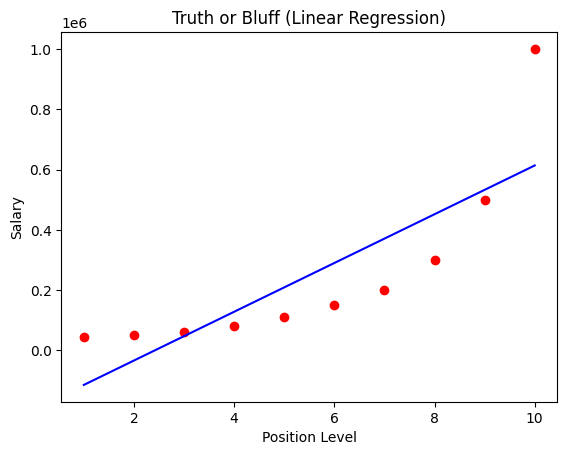

In [ ]:
# ================================
# Scatter plot of actual data
# ================================
# Red points represent the actual salaries for each level
plt.scatter(X, y, color='red')

# ================================
# Plot the Linear Regression line
# ================================
# Blue line represents predicted salaries by the Linear Regression model
plt.plot(X, lin_reg.predict(X), color='blue')

# ================================
# Add title and axis labels
# ================================
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

# ================================
# Display the plot
# ================================
plt.show()


## Visualising the Polynomial Regression results

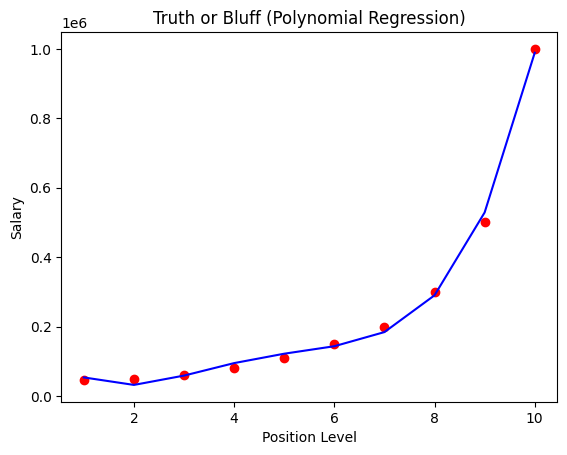

In [ ]:
# ================================
# Scatter plot of actual data
# ================================
# Red points represent the actual salaries for each level
plt.scatter(X, y, color='red')

# ================================
# Plot the Polynomial Regression curve
# ================================
# Blue line represents predicted salaries by the trained Polynomial Regression model
# Use the X_poly created during training, or transform X without refitting
plt.plot(X, lin_reg_2.predict(X_poly), color='blue')
# Alternative:
# plt.plot(X, lin_reg_2.predict(poly_reg.transform(X)), color='blue')

# ================================
# Add title and axis labels
# ================================
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

# ================================
# Display the plot
# ================================
plt.show()


## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

/tmp/ipython-input-1190554430.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


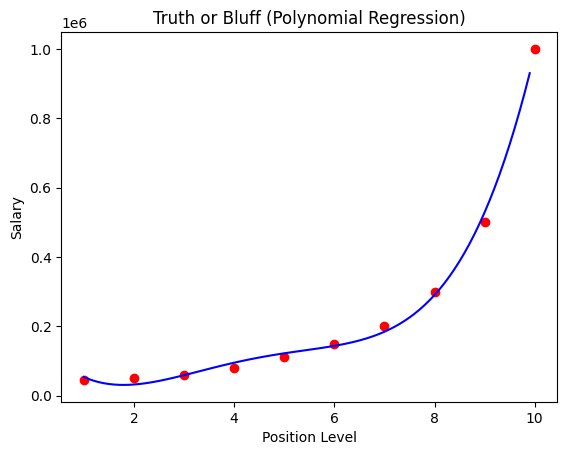

In [ ]:
# ================================
# Create a grid of X values for high resolution
# ================================
# np.arange(start, stop, step) → generates values from min(X) to max(X) with step 0.1
X_grid = np.arange(min(X), max(X), 0.1)

# ================================
# Reshape X_grid to be a 2D array
# ================================
# Required shape for sklearn: (n_samples, n_features)
X_grid = X_grid.reshape((len(X_grid), 1))

# ================================
# Scatter plot of actual data
# ================================
# Red points represent the actual salaries for each level
plt.scatter(X, y, color='red')

# ================================
# Plot the Polynomial Regression curve (smooth curve)
# ================================
# Use transform only, not fit_transform
plt.plot(X_grid, lin_reg_2.predict(poly_reg.transform(X_grid)), color='blue')

# ================================
# Add title and axis labels
# ================================
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')

# ================================
# Display the plot
# ================================
plt.show()


## Predicting a new result with Linear Regression

In [ ]:
# ================================
# Predict salary for a new Level using Linear Regression
# ================================
# We want to predict salary for Level = 6.5
# Input must be 2D array: [[6.5]]
pred_salary_linear = lin_reg.predict([[6.5]])

# ================================
# Print the predicted salary
# ================================
print(pred_salary_linear)

[330378.78787879]


## Predicting a new result with Polynomial Regression

In [ ]:
# ================================
# Predict salary for a new Level using Polynomial Regression
# ================================
# We want to predict salary for Level = 6.5
# Step 1: Transform the input to polynomial features
# Step 2: Use the trained Polynomial Regression model to predict
pred_salary_poly = lin_reg_2.predict(poly_reg.transform([[6.5]]))

# ================================
# Print the predicted salary
# ================================
print(pred_salary_poly)


[158862.45265155]


##BOUNS QUESTION

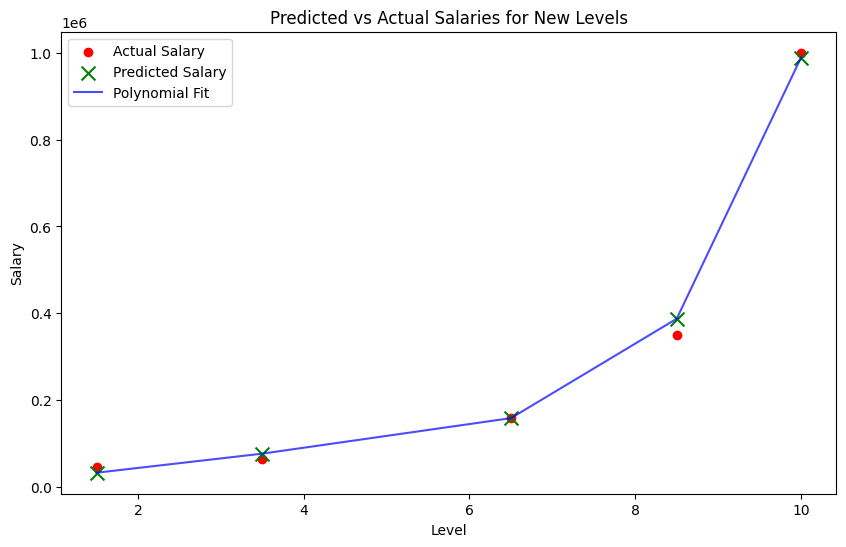

In [ ]:
# ================================================
# Polynomial Regression Prediction and Visualization for New Levels
# ================================================

# ================================
# New Levels for prediction
# ================================
# These are the new candidate levels for which we want to predict salary
X_new = np.array([1.5, 3.5, 6.5, 8.5, 10])

# ================================
# Reshape X_new to 2D array
# ================================
# Required shape for sklearn: (n_samples, n_features)
X_new = X_new.reshape((len(X_new), 1))

# ================================
# Transform new levels to polynomial features
# ================================
# Use the same PolynomialFeatures object that was used to train the model
X_new_poly = poly_reg.transform(X_new)

# ================================
# Predict salaries for the new levels
# ================================
# Using the trained Polynomial Regression model (lin_reg_2)
y_new_pred = lin_reg_2.predict(X_new_poly)

# ================================
# Suppose we have the actual salaries for these new levels
# ================================
y_new_actual = np.array([47000, 65000, 160000, 350000, 1000000])

# ================================
# Visualize Actual vs Predicted Salaries
# ================================
plt.figure(figsize=(10,6))

# Scatter plot for actual salaries
plt.scatter(X_new, y_new_actual, color='red', label='Actual Salary')

# Scatter plot for predicted salaries
plt.scatter(X_new, y_new_pred, color='green', label='Predicted Salary', marker='x', s=100)

# Plot Polynomial Regression curve for the new levels (smooth curve)
plt.plot(X_new, y_new_pred, color='blue', alpha=0.7, label='Polynomial Fit')

# or
# plt.plot(X, lin_reg_2.predict(X_poly), color='blue', alpha=0.7, label='Polynomial Fit')

# Add title and axis labels
plt.title('Predicted vs Actual Salaries for New Levels')
plt.xlabel('Level')
plt.ylabel('Salary')

# Add legend
plt.legend()

# Display the plot
plt.show()
